In [1]:
import seisbench.data as sbd
import matplotlib.pyplot as plt
import seisbench.generate as sbg
import numpy as np

from seisLM.data_pipeline.augmentations import FillMissingComponents


dataset = sbd.OBS(
      sampling_rate=100,
      component_order='ZNE',
      dimension_order='NCW',
      cache=None
)
if "split" not in dataset.metadata.columns:
  # logging.warning("No split defined, adding auxiliary split.")
  split = np.array(["train"] * len(dataset))
  split[int(0.6 * len(dataset)) : int(0.7 * len(dataset))] = "dev"
  split[int(0.7 * len(dataset)) :] = "test"
  dataset._metadata["split"] = split  # pylint: disable=protected-access


train, dev, test = dataset.train_dev_test()

print('len(train)', len(train))
train_complete_traces = train.metadata[train.metadata['trace_completeness'] == 1]
print('len(train_complete_traces)', len(train_complete_traces))

train_generator = sbg.GenericGenerator(train)
train_generator.add_augmentations([FillMissingComponents()])
# train_generator = MissingComponentGenericGenerator(train)


2024-08-27 10:00:30,132 | seisbench | WARNING | Found inconsistent component orders between data format and metadata. Using values from metadata.


len(train) 72935
len(train_complete_traces) 2999


len(train_generator) 72935


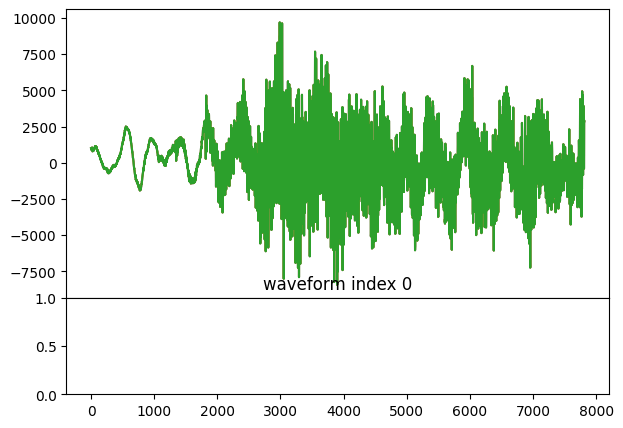

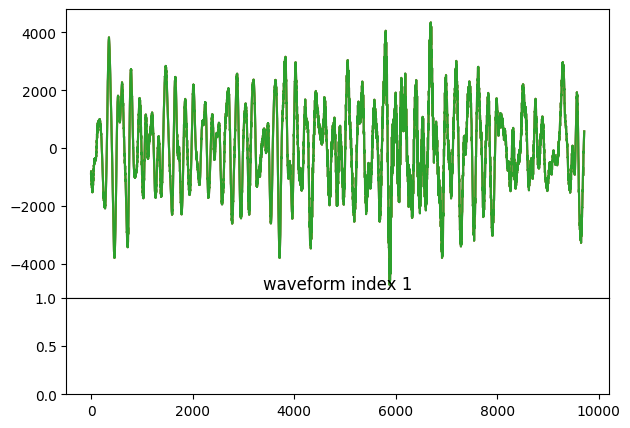

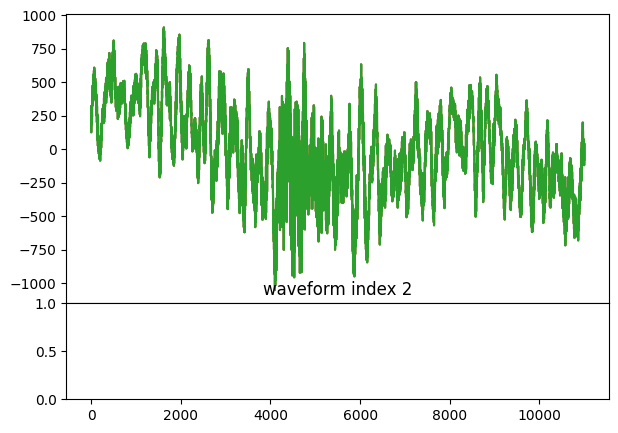

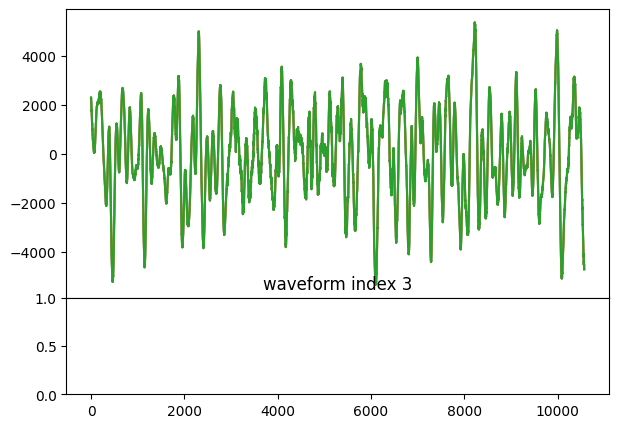

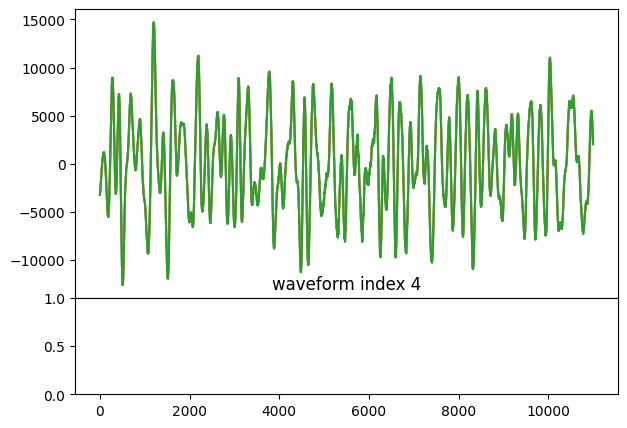

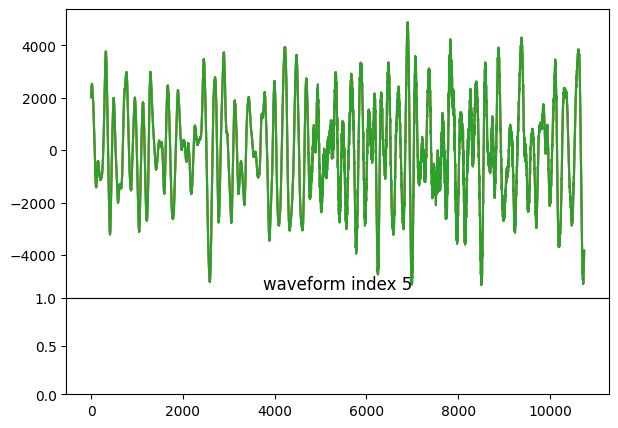

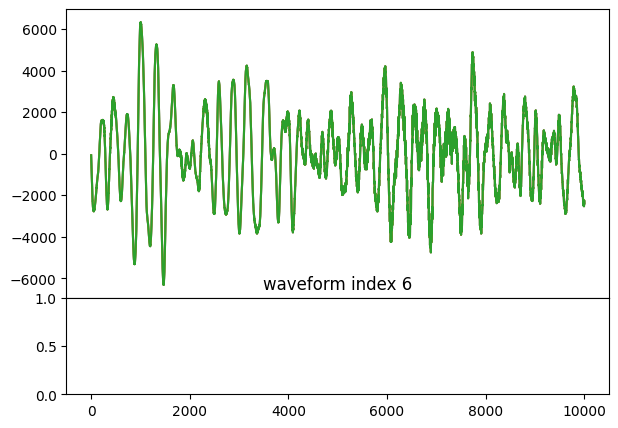

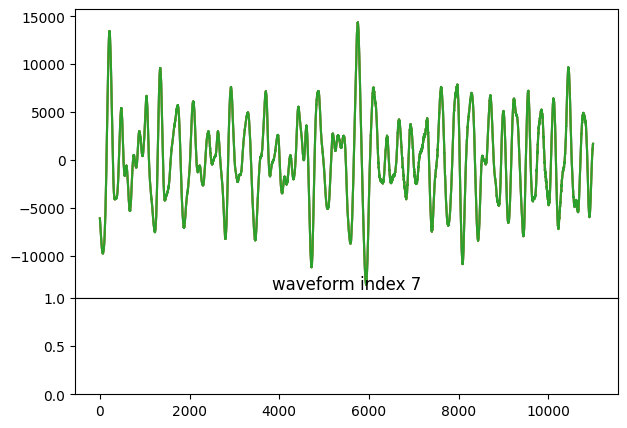

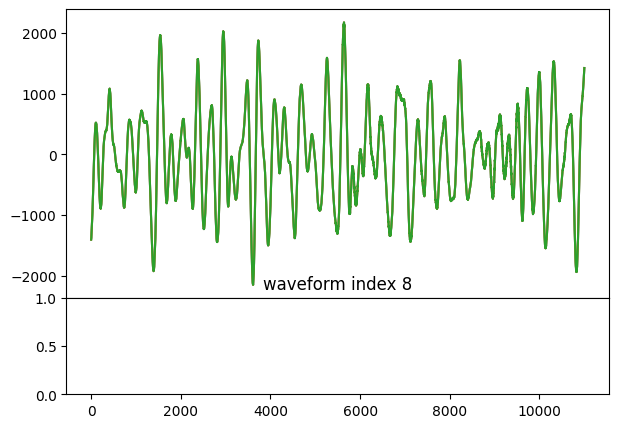

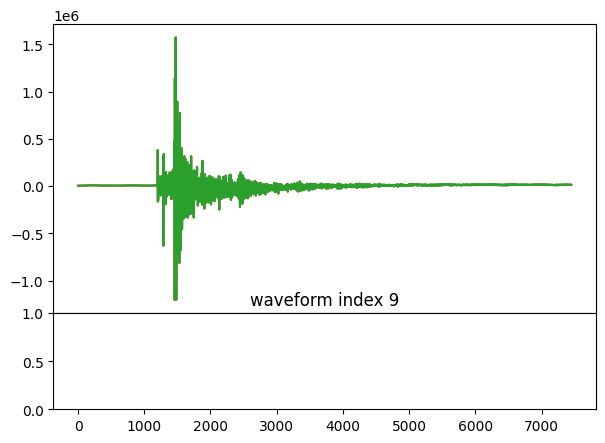

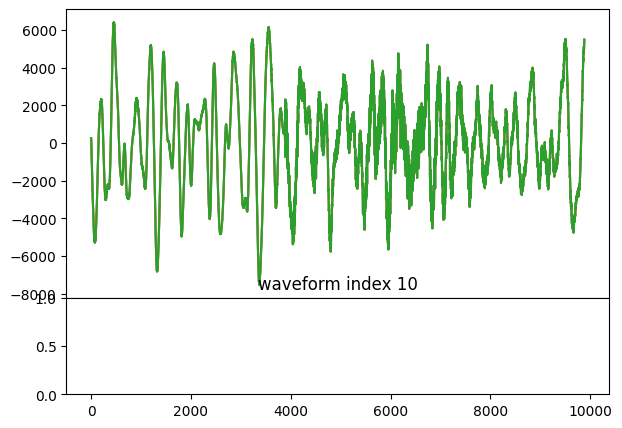

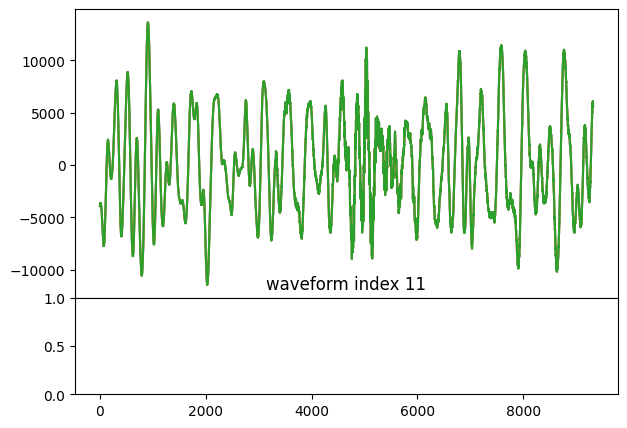

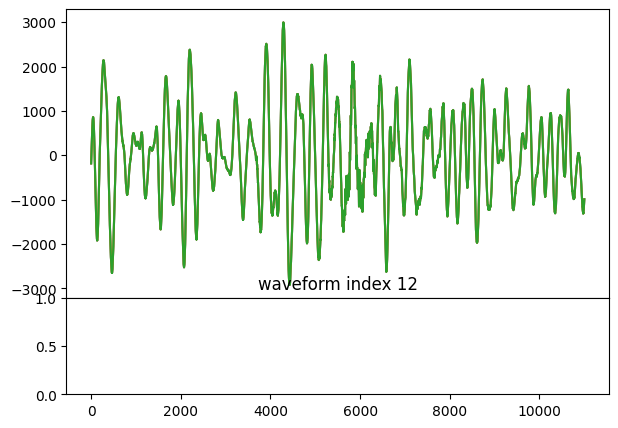

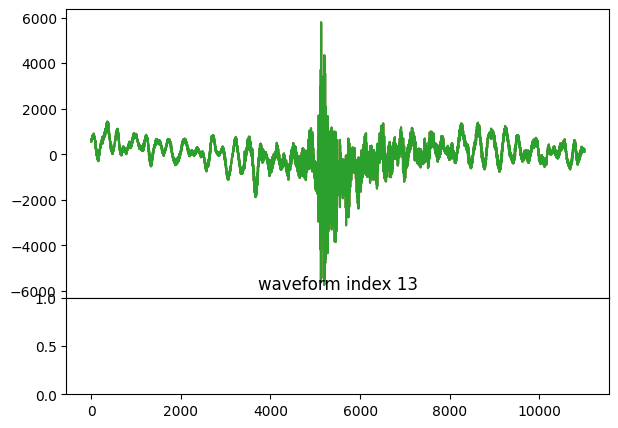

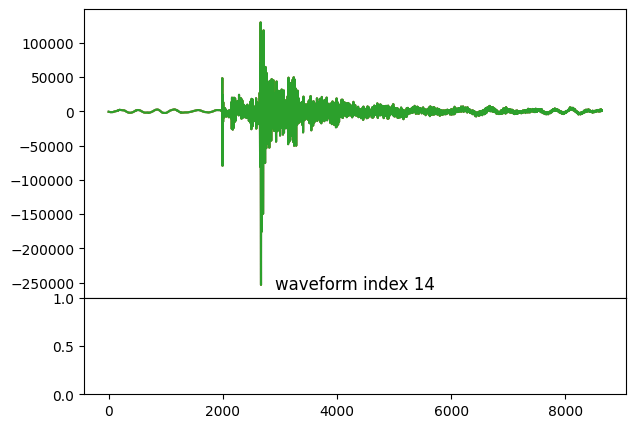

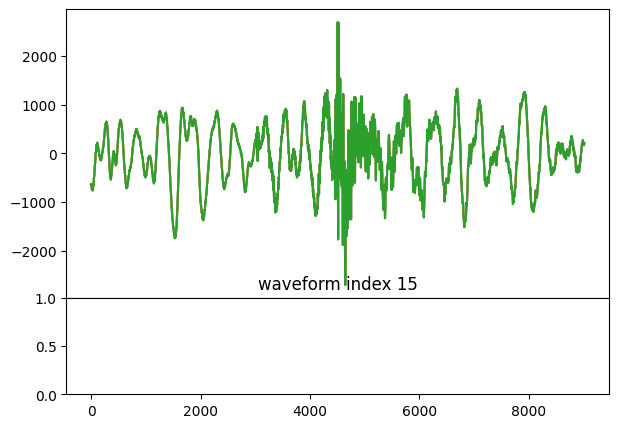

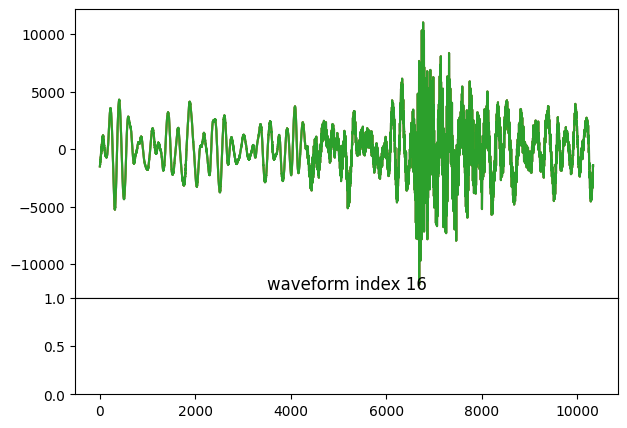

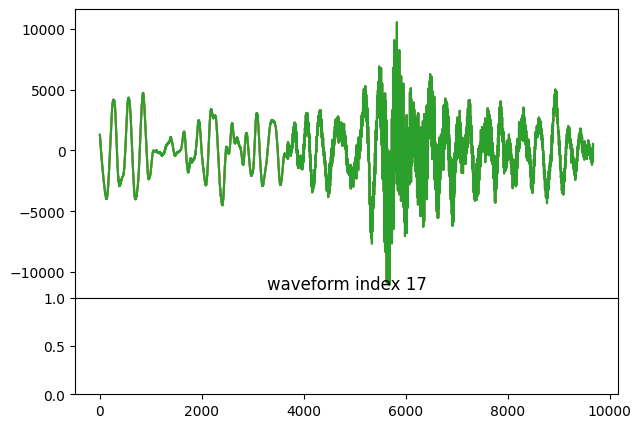

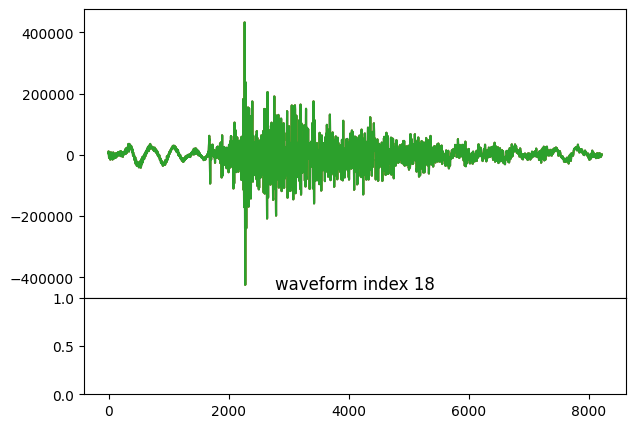

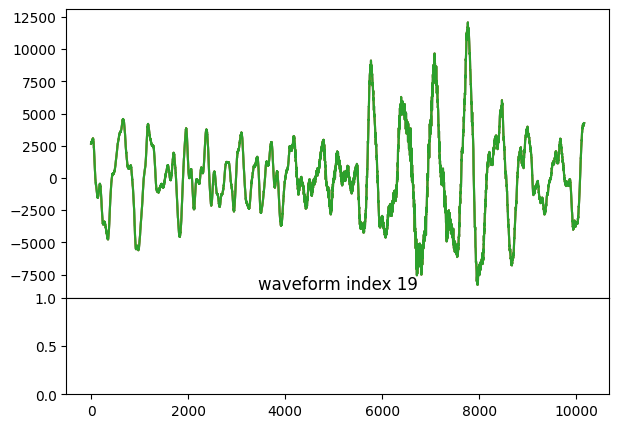

In [2]:
print('len(train_generator)', len(train_generator))

for i in range(20):
  sample = train_generator[i]
  waveform = sample["X"]
  fig = plt.figure(figsize=(7, 5))
  axs = fig.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0, "height_ratios": [3, 1]})
  axs[0].plot(sample["X"].T);
  # axs[1].plot(sample["y"].T);
  plt.title(f'waveform index {i}')

In [3]:
waveform

array([[2667.26392442, 2714.26392442, 2746.26392442, ..., 4234.26392442,
        4253.26392442, 4256.26392442],
       [2667.26392442, 2714.26392442, 2746.26392442, ..., 4234.26392442,
        4253.26392442, 4256.26392442],
       [2667.26392442, 2714.26392442, 2746.26392442, ..., 4234.26392442,
        4253.26392442, 4256.26392442]])